# Album-art genre classifier
## Experiment 1: dataset of 7000 images

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *

In [2]:
!ls album-art/

heavy_metal	 jazz	   models  pop.txt  rap.txt  rock.txt
heavy_metal.txt  jazz.txt  pop	   rap	    rock


In [5]:
DATA_PATH = 'album-art'

In [6]:
BATCH_SIZE = 64

In [7]:
path = Path(DATA_PATH)

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,
        ds_tfms=get_transforms(do_flip=False, max_rotate=0., max_warp=0.), size=224, num_workers=4, bs=BATCH_SIZE).normalize(imagenet_stats)

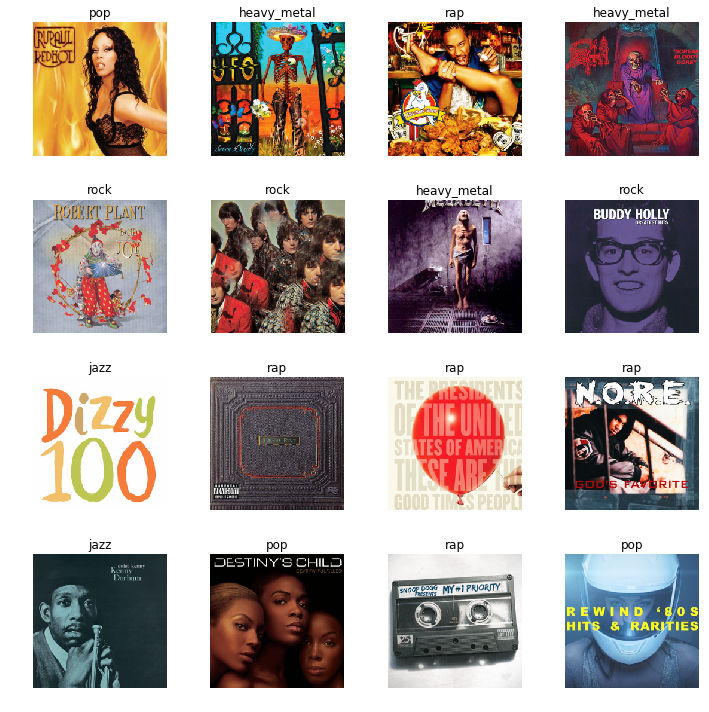

In [29]:
data.show_batch(rows=4, figsize=(10,10))

In [15]:
print(data.classes)
print(f'Training size: {len(data.train_ds)}')
print(f'Validation size: {len(data.valid_ds)}')
print(f'Total: {len(data.train_ds) + len(data.valid_ds)}')

['heavy_metal', 'jazz', 'pop', 'rap', 'rock']
Training size: 6268
Validation size: 732
Total: 7000


## Training: resnet34

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

Total time: 03:04
epoch  train_loss  valid_loss  error_rate
1      1.323123    0.955853    0.381148    (00:50)
2      1.067877    0.890824    0.340164    (00:44)
3      0.877608    0.798853    0.315574    (00:44)
4      0.745334    0.779318    0.307377    (00:44)



30% error rate. That's not good. Probably need to get more data.

In [16]:
learn.save('7000-im-stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

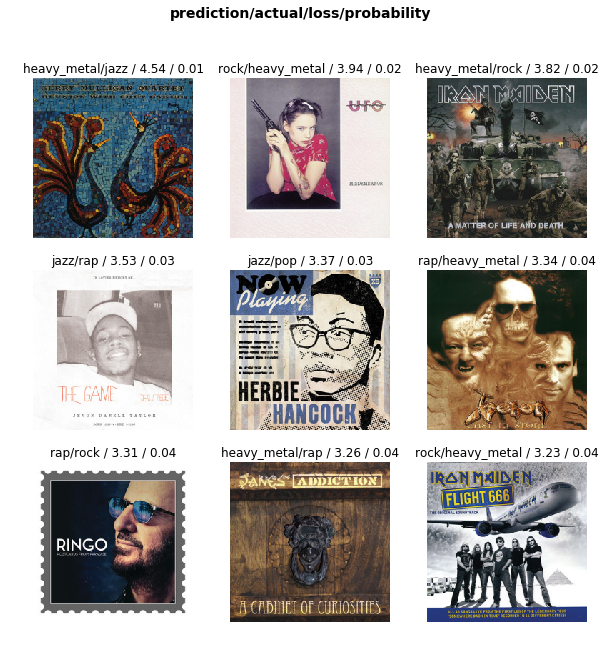

In [19]:
interp.plot_top_losses(9, figsize=(10,10))

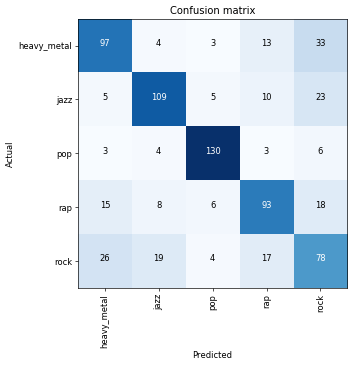

In [20]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

I sort of expected the model to get confused between heavy metal and rock covers, as well as jazz and rock covers. But it is also confusing rap covers with those of HM, rock, and jazz. Pop covers are fairly distinct so it's doing good there.

In [23]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


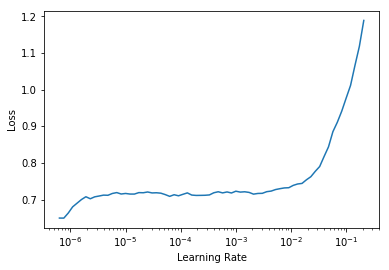

In [24]:
learn.recorder.plot()

That doesn't look very good. Loss is almost only going up as lr is increased.

Training with layers unfreezed.

In [25]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

Total time: 04:20
epoch  train_loss  valid_loss  error_rate
1      0.707025    0.749876    0.304645    (01:06)
2      0.596158    0.686231    0.271858    (01:04)
3      0.458830    0.655235    0.266393    (01:04)
4      0.368226    0.640476    0.256831    (01:04)



In [26]:
learn.save('7000-im-unfreezed-4-epochs')

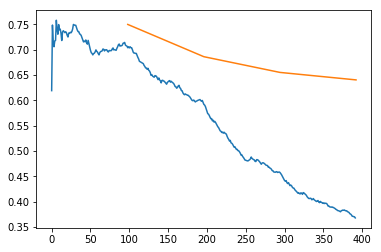

In [27]:
learn.recorder.plot_losses()

Training some more.

In [28]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

Total time: 04:18
epoch  train_loss  valid_loss  error_rate
1      0.366097    0.646954    0.258197    (01:04)
2      0.317219    0.640392    0.248634    (01:04)
3      0.233588    0.644563    0.245902    (01:04)
4      0.186055    0.650488    0.250000    (01:04)



Seems around 25% error rate is the best we can do here. Time to get more data.